In [6]:
# exclude warning
import warnings
warnings.filterwarnings("ignore", message="Consider using IPython.display.IFrame instead")

# import library 
from IPython.display import HTML

# embed video
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/SVcsDDABEkM" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')


In [7]:
# Install required libraries
!pip install --upgrade git+https://github.com/huggingface/diffusers.git transformers accelerate scipy

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/huggingface/diffusers.git to c:\users\aryan\appdata\local\temp\pip-req-build-ku0_r2of
  Resolved https://github.com/huggingface/diffusers.git to commit e1bdcc7af38ff9d1d8fbdc223aa7b306b19bfdff
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git 'C:\Users\aryan\AppData\Local\Temp\pip-req-build-ku0_r2of'


In [9]:
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
import torch
from torch import autocast

In [10]:
# Set up GPU environment
device = "cuda" if torch.cuda.is_available() else "cpu"
torch_device = torch.device(device)

In [11]:
# Set up pipeline with Stable Diffusion model and scheduler
model_id = "stabilityai/stable-diffusion-2"

In [12]:
# Load scheduler
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")

In [13]:
# Load Stable Diffusion pipeline
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, revision="fp16", torch_dtype=torch.float16)
pipe = pipe.to(torch_device)

C:\Users\aryan\AppData\Roaming\Python\Python39\site-packages\diffusers\pipelines\pipeline_utils.py:270: FutureWarning: You are loading the variant fp16 from stabilityai/stable-diffusion-2 via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(
unet\diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\aryan\AppData\Roaming\Python\Python39\site-packages\diffusers\models\lora.py:384: FutureWarning: `LoRACompatibleLinear` is deprecated and will be removed in version 1.0.0. Use of `LoRACompatibleLinear` is deprecated. Please switch to PEFT backend by installing PEFT: `pip install peft`.
  deprecate("LoRACompatibleLinear", "1.0.0", deprecation_message)
C:\Users\aryan\AppData\Roaming\Python\Python39\site-packages\diffusers\models\lora.py:300: FutureWarning: `LoRACompatibleConv` is deprecated and will be removed in version 1.0.0. Use of `LoRACompatibleConv` is deprecated. Please switch to PEFT backend by installing PEFT: `pip install peft`.
  deprecate("LoRACompatibleConv", "1.0.0", deprecation_message)
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this devic

In [16]:
# Ensure torch is using float32
torch.set_default_dtype(torch.float32)

In [17]:
# Set up pipeline with Stable Diffusion model and scheduler
model_id = "stabilityai/stable-diffusion-2"

In [18]:
# Load scheduler
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")

In [19]:
# Load Stable Diffusion pipeline
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, revision="fp16", torch_dtype=torch.float32)
pipe = pipe.to(torch_device)

unet\diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

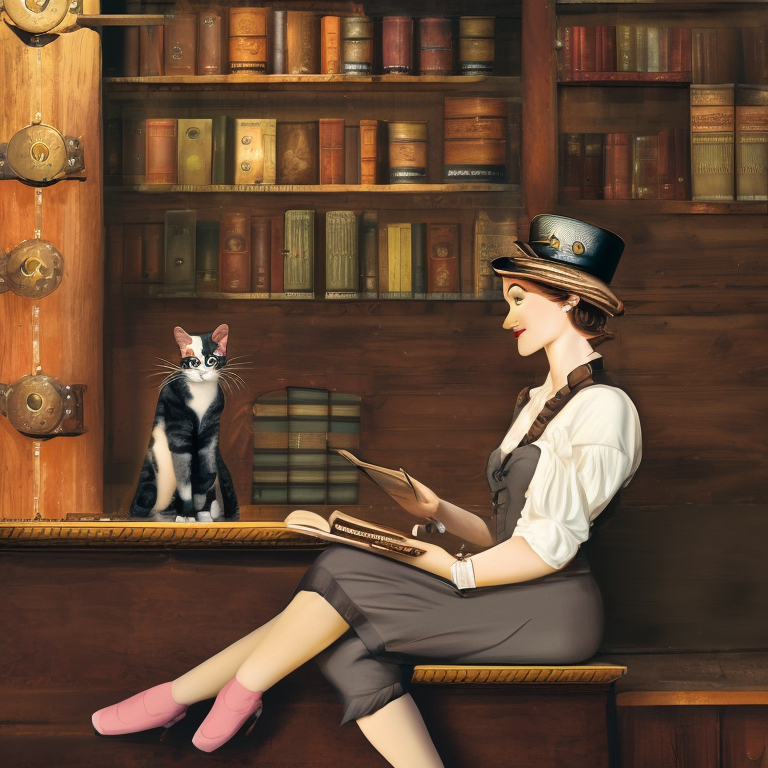

In [20]:
# Prompt
prompt = 'A steampunk woman reading a book with her cat at the bar'

# Inference
image = pipe(prompt, height=768, width=768).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

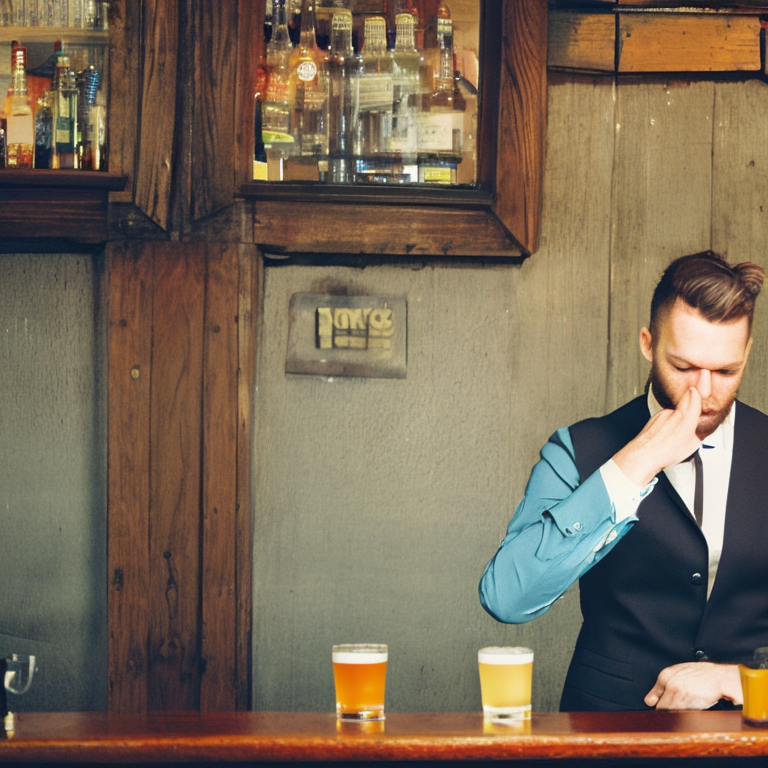

In [21]:
# Prompt
prompt = 'A businessman at a pub'

# Inference
image = pipe(prompt, height=768, width=768).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

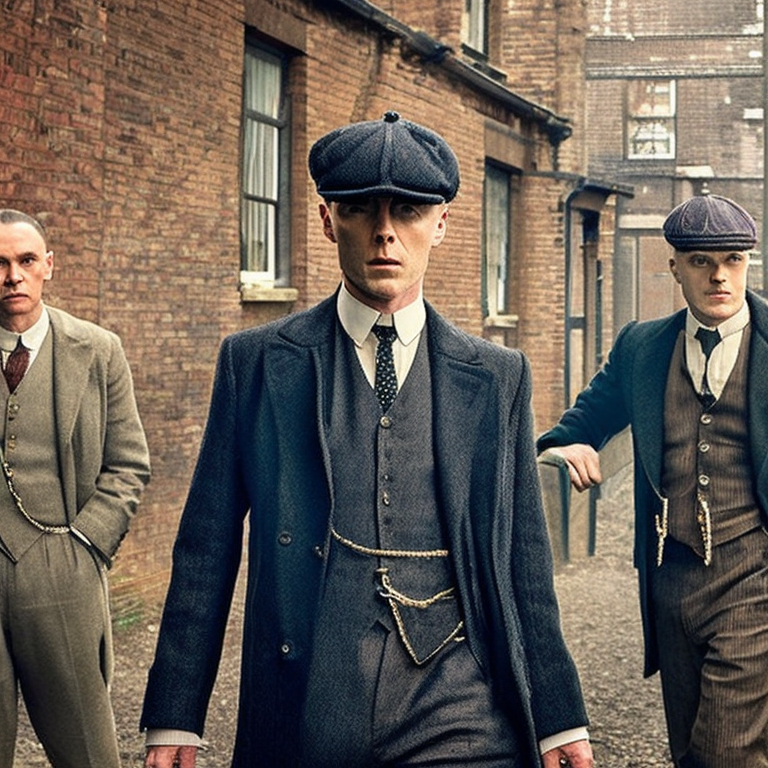

In [22]:
# Prompt
prompt = 'Peaky Blinders'

# Inference
image = pipe(prompt, height=768, width=768).images[0]
image